In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [35]:
responses = pd.read_csv('responses.csv', encoding='latin1')

In [36]:
responses.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=150)

In [37]:
responses_health = responses.loc[
    (responses['Height'] > 140),
    ['Smoking', 'Alcohol', 'Healthy eating', 'Age', 'Height', 'Weight', 'Number of siblings', 'Gender']].dropna()
responses_health.head()

,Smoking,Alcohol,Healthy eating,Age,Height,Weight,Number of siblings,Gender
0,never smoked,drink a lot,4.0,20.0,163.0,48.0,1.0,female
1,never smoked,drink a lot,3.0,19.0,163.0,58.0,2.0,female
2,tried smoking,drink a lot,3.0,20.0,176.0,67.0,2.0,female
3,former smoker,drink a lot,3.0,22.0,172.0,59.0,1.0,female
4,tried smoking,social drinker,4.0,20.0,170.0,59.0,1.0,female


In [38]:
responses_health.columns

Index(['Smoking', 'Alcohol', 'Healthy eating', 'Age', 'Height', 'Weight',
       'Number of siblings', 'Gender'],
      dtype='object')

In [39]:
responses_health.describe()

,Healthy eating,Age,Height,Weight,Number of siblings
count,961.000000,961.000000,961.000000,961.000000,961.000000
mean,3.035380,20.432882,173.620187,66.359001,1.287201
std,0.939191,2.833931,9.395831,13.503979,1.011771
min,1.000000,15.000000,148.000000,41.000000,0.000000
25%,3.000000,19.000000,167.000000,55.000000,1.000000
50%,3.000000,20.000000,173.000000,64.000000,1.000000
75%,4.000000,22.000000,180.000000,75.000000,2.000000
max,5.000000,30.000000,203.000000,150.000000,10.000000


In [40]:
responses_health['Smoking'].unique()

array(['never smoked', 'tried smoking', 'former smoker', 'current smoker'],
      dtype=object)

In [41]:
responses_health['Alcohol'].unique()

array(['drink a lot', 'social drinker', 'never'], dtype=object)

In [51]:
features = pd.get_dummies(responses_health['Alcohol'])
features = pd.get_dummies(responses_health['Smoking'])

In [52]:
responses_health.columns

Index(['Smoking', 'Alcohol', 'Healthy eating', 'Age', 'Height', 'Weight',
       'Number of siblings', 'Gender'],
      dtype='object')

In [114]:
features['Smoker'] = np.where(responses_health['Smoking'] == 'current smoker', 1, 0)
features['Drinker'] = np.where(responses_health['Alcohol'] == 'drink a lot', 1, 0)

In [54]:
print(responses_health['Smoking'].groupby(features['Smoker']).describe())

       count unique             top freq
Smoker                                  
0        779      3   tried smoking  415
1        182      1  current smoker  182


In [59]:
responses_health['MaleFemale'] = np.where(responses_health['Gender'] == 'male', 1, 0)

In [60]:
features.head()

,current smoker,former smoker,never smoked,tried smoking,Smoker,Gender
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


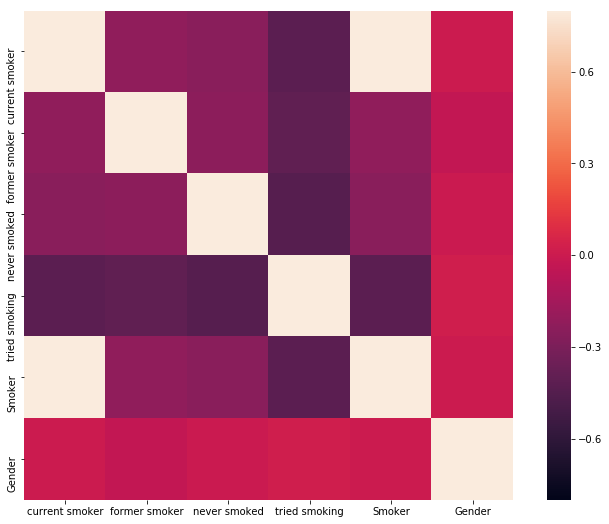

In [61]:
corrmat = features.corr()

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corrmat, vmax=.8, vmin=-.8, square=True)
plt.show()

In [62]:
means = responses_health[['Height', 'Weight', 'MaleFemale']].mean(axis=0)
stds = responses_health[['Height', 'Weight', 'MaleFemale']].std(axis=0)
features['height_weight_gender'] = ((responses_health[['Height', 'Weight', 'MaleFemale']] - means) / stds).mean(axis=1)

plotdf = responses_health.loc[:, ['Height', 'Weight', 'MaleFemale']]
plotdf['height_weight_gender'] = features['height_weight_gender'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                        Height    Weight  MaleFemale  height_weight_gender
Height                1.000000  0.735096    0.720934              0.912186
Weight                0.735096  1.000000    0.668655              0.892770
MaleFemale            0.720934  0.668655    1.000000              0.887510
height_weight_gender  0.912186  0.892770    0.887510              1.000000


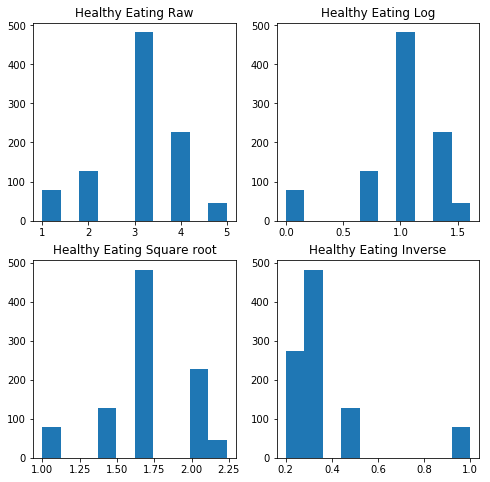

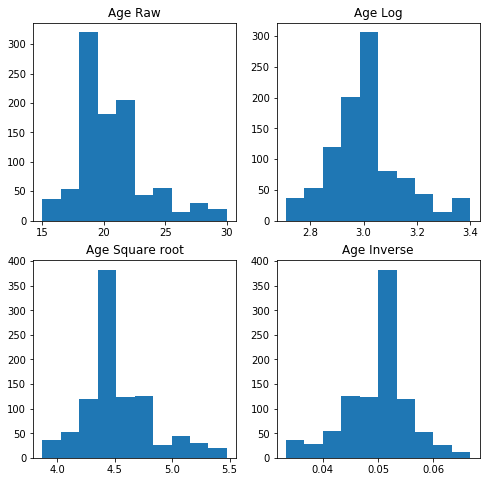

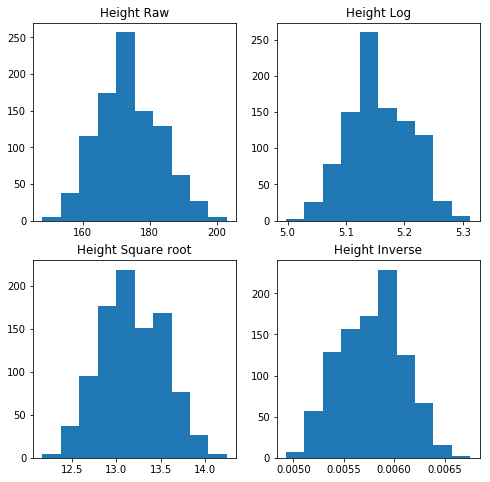

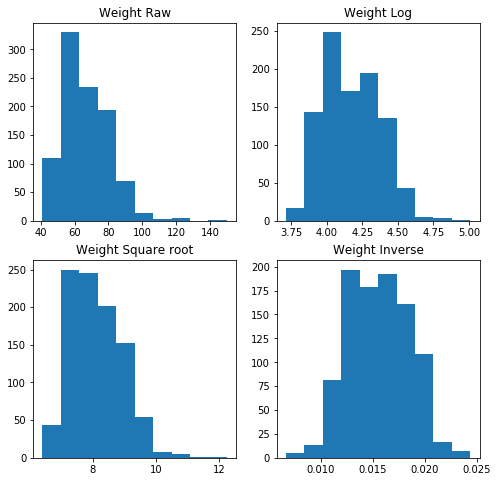

In [90]:
fig = plt.figure(figsize=(8,8))

fig.add_subplot(221)
plt.hist(responses_health['Healthy eating'].dropna())
plt.title('Healthy Eating Raw')

fig.add_subplot(222)
plt.hist(np.log(responses_health['Healthy eating'].dropna()))
plt.title('Healthy Eating Log')

fig.add_subplot(223)
plt.hist(np.sqrt(responses_health['Healthy eating'].dropna()))
plt.title('Healthy Eating Square root')

ax3=fig.add_subplot(224)
plt.hist(1/responses_health['Healthy eating'].dropna())
plt.title('Healthy Eating Inverse')
plt.show()



fig = plt.figure(figsize=(8,8))

fig.add_subplot(221)
plt.hist(responses_health['Age'].dropna())
plt.title('Age Raw')

fig.add_subplot(222)
plt.hist(np.log(responses_health['Age'].dropna()))
plt.title('Age Log')

fig.add_subplot(223)
plt.hist(np.sqrt(responses_health['Age'].dropna()))
plt.title('Age Square root')

ax3=fig.add_subplot(224)
plt.hist(1/responses_health['Age'].dropna())
plt.title('Age Inverse')
plt.show()



fig = plt.figure(figsize=(8,8))

fig.add_subplot(221)
plt.hist(responses_health['Height'].dropna())
plt.title('Height Raw')

fig.add_subplot(222)
plt.hist(np.log(responses_health['Height'].dropna()))
plt.title('Height Log')

fig.add_subplot(223)
plt.hist(np.sqrt(responses_health['Height'].dropna()))
plt.title('Height Square root')

ax3=fig.add_subplot(224)
plt.hist(1/responses_health['Height'].dropna())
plt.title('Height Inverse')
plt.show()



fig = plt.figure(figsize=(8,8))

fig.add_subplot(221)
plt.hist(responses_health['Weight'].dropna())
plt.title('Weight Raw')

fig.add_subplot(222)
plt.hist(np.log(responses_health['Weight'].dropna()))
plt.title('Weight Log')

fig.add_subplot(223)
plt.hist(np.sqrt(responses_health['Weight'].dropna()))
plt.title('Weight Square root')

ax3=fig.add_subplot(224)
plt.hist(1/responses_health['Weight'].dropna())
plt.title('Weight Inverse')
plt.show()


#responses_health['Number of siblings'] = responses_health['Number of siblings'].astype(int)

#fig = plt.figure(figsize=(8,8))

#fig.add_subplot(221)
#plt.hist(responses_health['Number of siblings'].dropna())
#plt.title('Number of siblings Raw')

#fig.add_subplot(222)
#plt.hist(np.log(responses_health['Number of siblings'].dropna()))
#plt.title('Number of siblings Log')

#fig.add_subplot(223)
#plt.hist(np.sqrt(responses_health['Number of siblings'].dropna()))
#plt.title('Number of siblings Square root')

#ax3=fig.add_subplot(224)
#plt.hist(1/responses_health['Number of siblings'].dropna())
#plt.title('Number of siblings Inverse')
#plt.show()

In [91]:
features['healthy eating'] = responses_health['Healthy eating']
features['age'] = np.log(responses_health['Age'])
features['height'] = responses_health['Height']
features['weight'] = 1/responses_health['Weight']

In [92]:
responses_health['Number of siblings'].dtype

dtype('int64')

In [93]:
responses_health['Number of siblings'].unique()

array([ 1,  2,  3, 10,  0,  4,  5,  6])

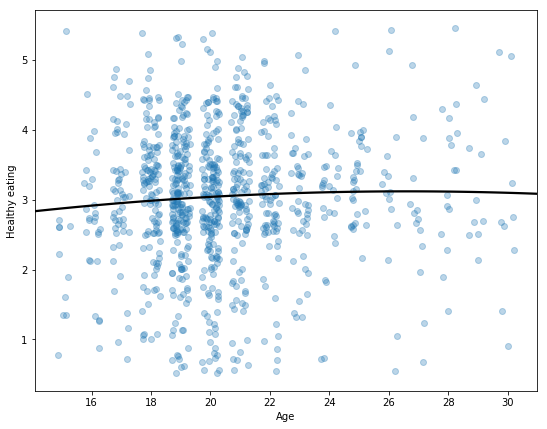

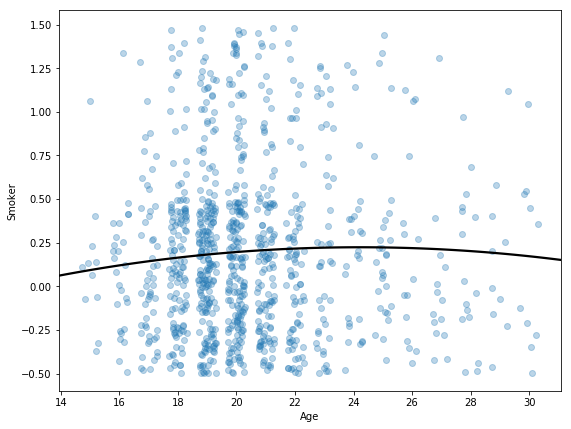

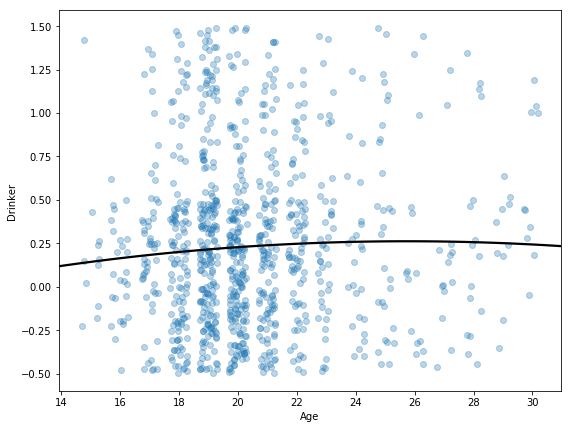

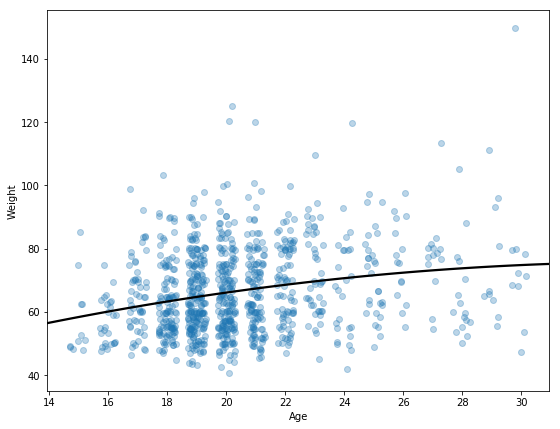

In [116]:
fig = plt.figure(figsize=(9,7))
sns.regplot(
    responses_health['Age'],
    y=responses_health['Healthy eating'],
    y_jitter=.5,
    x_jitter=.3,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

fig = plt.figure(figsize=(9,7))
sns.regplot(
    responses_health['Age'],
    y=features['Smoker'],
    y_jitter=.5,
    x_jitter=.3,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

fig = plt.figure(figsize=(9,7))
sns.regplot(
    responses_health['Age'],
    y=features['Drinker'],
    y_jitter=.5,
    x_jitter=.3,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

fig = plt.figure(figsize=(9,7))
sns.regplot(
    responses_health['Age'],
    y=responses_health['Weight'],
    y_jitter=.5,
    x_jitter=.3,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

#features['age_squared'] = df['agea'] * df['agea']

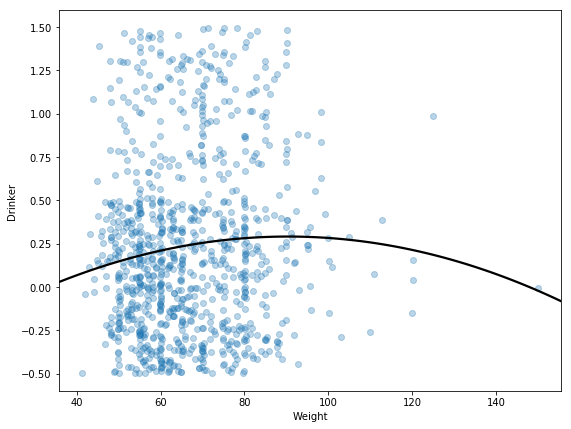

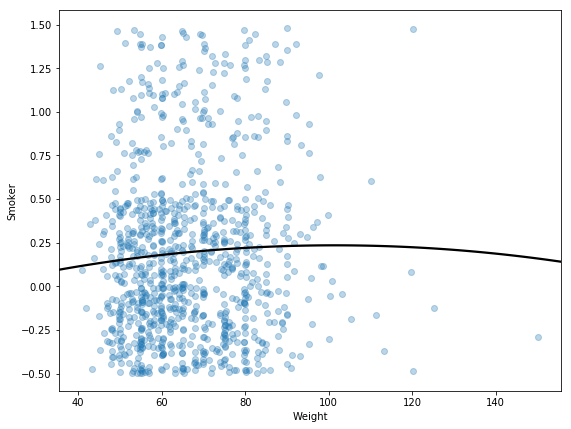

In [120]:
fig = plt.figure(figsize=(9,7))
sns.regplot(
    responses_health['Weight'],
    y=features['Drinker'],
    y_jitter=.5,
    x_jitter=.3,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

fig = plt.figure(figsize=(9,7))
sns.regplot(
    responses_health['Weight'],
    y=features['Smoker'],
    y_jitter=.5,
    x_jitter=.3,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()



In [121]:
#KEVIN - Check out "Creating Linear Relationship" in the text. I see a couple of these that
#look to have nonlinear relationships. But why does the text then create a feature
#that is just the age squared when the regplot is age by social meet?

In [123]:
features['age_squared'] = responses_health['Age'] * responses_health['Age']

In [130]:
responses_health['Health'] = responses['Health'].dropna().astype(int)
responses_health['Health'].unique()

array([ 1.,  4.,  2.,  3.,  5., nan])

In [131]:
responses_health['Health'].dtype

dtype('float64')

In [133]:
responses_health['Happiness'] = responses['Happiness in life'].dropna().astype(int)

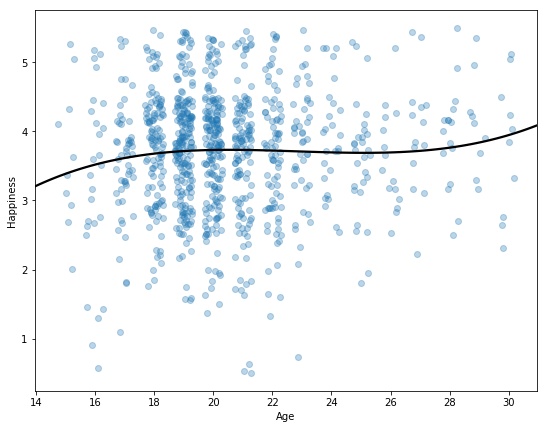

In [137]:
fig = plt.figure(figsize=(9,7))
sns.regplot(
    responses_health['Age'],
    y=responses_health['Happiness'],
    y_jitter=.5,
    x_jitter=.3,
    order=3,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

In [140]:
np.polyfit(responses_health['Age'], responses_health['Happiness'], deg=20)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [142]:
responses_health['smoker_drinker'] = features['Smoker'] * features['Drinker']

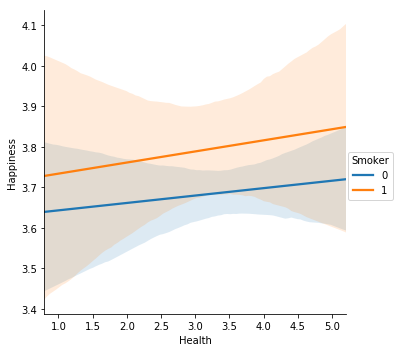

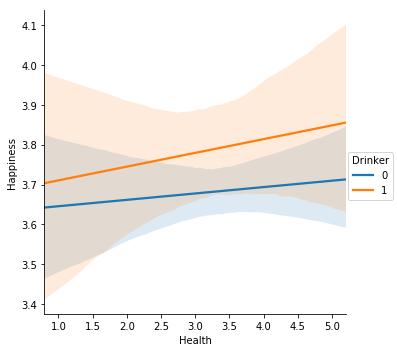

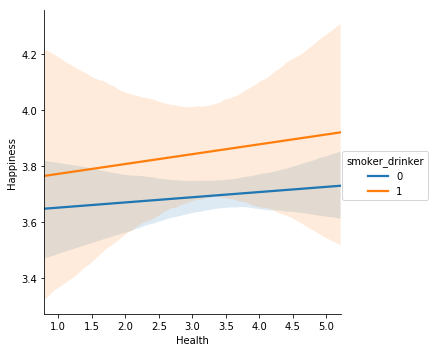

In [151]:
responses_health['Smoker'] = features['Smoker']

sns.lmplot(
    x='Health',
    y='Happiness',
    hue='Smoker',
    data=responses_health,
    scatter=False
)
plt.show()

responses_health['Drinker'] = features['Drinker']

sns.lmplot(
    x='Health',
    y='Happiness',
    hue='Drinker',
    data=responses_health,
    scatter=False
)
plt.show()

sns.lmplot(
    x='Health',
    y='Happiness',
    hue='smoker_drinker',
    data=responses_health,
    scatter=False
)
plt.show()

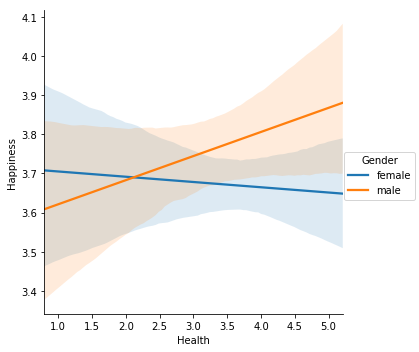

In [145]:
sns.lmplot(
    x='Health',
    y='Happiness',
    hue='Gender',
    data=responses_health,
    scatter=False
)
plt.show()

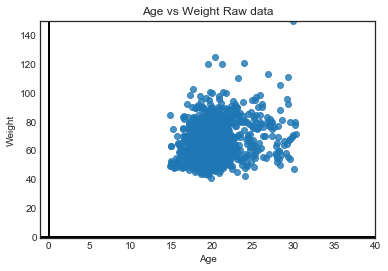

In [156]:
sns.set_style("white")
t = sns.regplot(
    'Age',
    'Weight',
    responses_health,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 40), ylim=(-1, 150))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Age vs Weight Raw data')
plt.show()

In [157]:
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
responses_health['Age_z'] = (responses_health['Age'] - responses_health['Age'].mean()) / responses_health['Age'].std()
responses_health['Weight_z'] = (responses_health['Weight'] - responses_health['Weight'].mean()) / responses_health['Weight'].std()

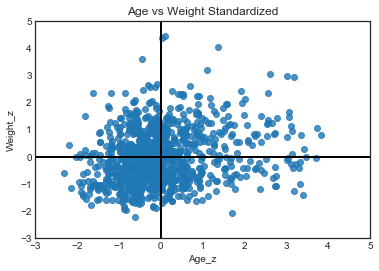

In [161]:
t = sns.regplot(
    'Age_z',
    'Weight_z',
    responses_health,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-3, 5), ylim=(-3, 5))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Age vs Weight Standardized')
plt.show()

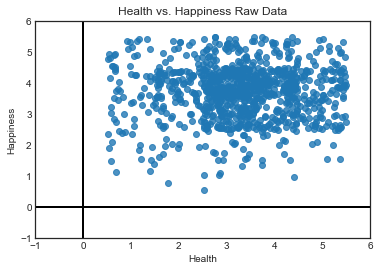

In [164]:
t = sns.regplot(
    'Health',
    'Happiness',
    responses_health,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 6), ylim=(-1, 6))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Health vs. Happiness Raw Data')
plt.show()

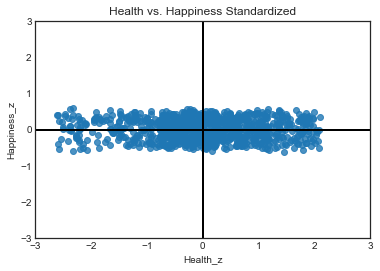

In [165]:
responses_health['Health_z'] = (responses_health['Health'] - responses_health['Health'].mean()) / responses_health['Health'].std()
responses_health['Happiness_z'] = (responses_health['Happiness'] - responses_health['Happiness'].mean()) / responses_health['Weight'].std()

t = sns.regplot(
    'Health_z',
    'Happiness_z',
    responses_health,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-3, 3), ylim=(-3, 3))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Health vs. Happiness Standardized')
plt.show()

In [168]:
X = StandardScaler().fit_transform(features)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00104167 -0.2235115  -0.2441305  -0.42183911  1.00104167  0.00541817
   0.03491563 -0.1343558   0.0527855   0.02523147 -0.06567101  0.2235022
   0.04333858  0.60690449]
 [-0.2235115   1.00104167 -0.23331133 -0.40314441 -0.2235115  -0.03135261
  -0.00872327  0.08459171  0.07507473 -0.01247381 -0.02656083  0.10497353
   0.08466263 -0.13550898]
 [-0.2441305  -0.23331133  1.00104167 -0.44033459 -0.2441305  -0.00186178
  -0.00921917 -0.01075853 -0.07204561 -0.01873763  0.02302363 -0.17888487
  -0.04662    -0.14800972]
 [-0.42183911 -0.40314441 -0.44033459  1.00104167 -0.42183911  0.02132255
  -0.01342907  0.04999735 -0.04095952  0.00484199  0.05366736 -0.11223367
  -0.06149936 -0.25574965]
 [ 1.00104167 -0.2235115  -0.2441305  -0.42183911  1.00104167  0.00541817
   0.03491563 -0.1343558   0.0527855   0.02523147 -0.06567101  0.2235022
   0.04333858  0.60690449]
 [ 0.00541817 -0.03135261 -0.00186178  0.02132255  0.00541817  1.00104167
   0.888434   -0.06540428  0.1410

In [169]:
responses_health.columns

Index(['Smoking', 'Alcohol', 'Healthy eating', 'Age', 'Height', 'Weight',
       'Number of siblings', 'Gender', 'MaleFemale', 'Health', 'Happiness',
       'smoker_drinker', 'Smoker', 'Drinker', 'Age_z', 'Weight_z', 'Health_z',
       'Happiness_z'],
      dtype='object')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


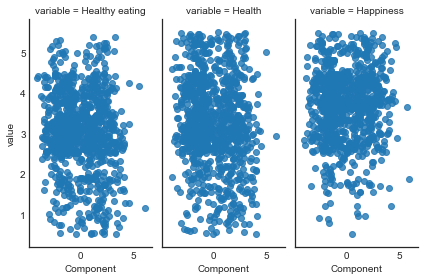

In [172]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 14).T

P = eig_vec_cov[:, 0]
Y = P.T.dot(Xt)
data_to_plot = responses_health[['Healthy eating', 'Health', 'Happiness']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

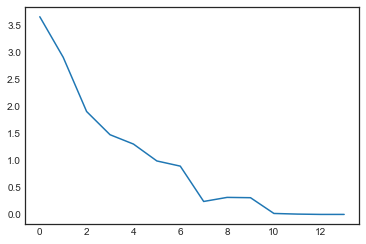

In [173]:
plt.plot(eig_val_cov)
plt.show()

In [174]:
features.head()

,current smoker,former smoker,never smoked,tried smoking,Smoker,Gender,height_weight_gender,healthy eating,age,height,weight,Drinker,age_squared,smoker_drinker
0,0,0,1,0,0,0,-1.108862,4.0,2.995732,163.0,0.020833,1,400.0,0
1,0,0,1,0,0,0,-0.862021,3.0,2.944439,163.0,0.017241,1,361.0,0
2,0,0,0,1,0,0,-0.178667,3.0,2.995732,176.0,0.014925,1,400.0,0
3,0,1,0,0,0,0,-0.518047,3.0,3.091042,172.0,0.016949,1,484.0,0
4,0,0,0,1,0,0,-0.589000,4.0,2.995732,170.0,0.016949,0,400.0,0
